# Hopfield model
##### Disclaimer: This code is based on a Matlab file that was given in the course NEVR3004 at NTNU. The code was generalized to cover any amount of patterns. In addition, also implemented the Lyapunov energy function and made a formula that relates the number of neurons and the amount of patterns that can be stored before the system becomes unstable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import random

Number of neurons 100


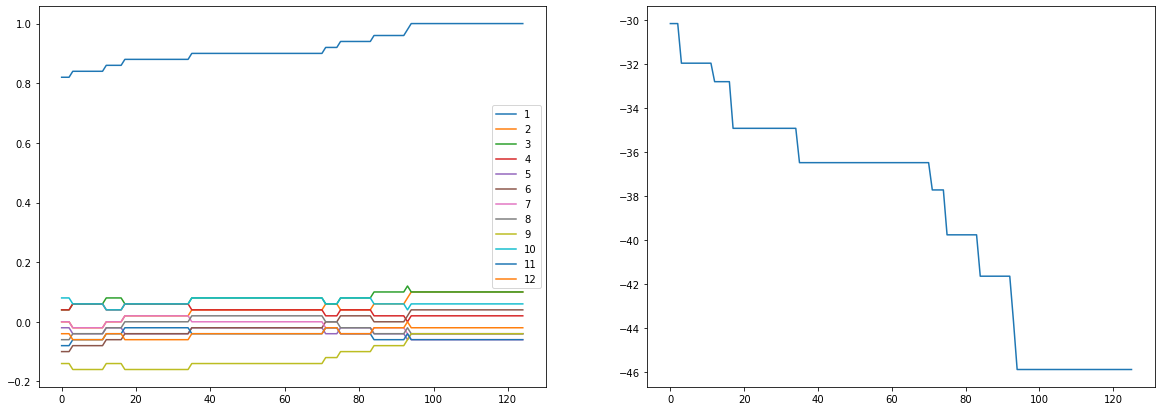

In [43]:
def Weight_matrix(N,n_patt,patts):
    tmp = np.zeros((N,N))
    W = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i != j:
                for p in range(n_patt):
                    tmp[i,j] = tmp[i,j] +  patts[p,i]*patts[p,j]
                W[i,j] = tmp[i,j]/N
    return W
def Noise(N, patts, noise_pattern, noise_prob):
    S = np.zeros(N)
    rand_inds = random.sample(range(0,N),int(noise_prob*N))
    S[:] = patts[noise_pattern,:]
        
    for i in rand_inds:
        if random.uniform(0,1) < 0.5:
            S[i] = -1
        else:
            S[i] = 1
    return S

def Energy(w,s):
    E = -0.5 * s @ w @ s
    return E

def Hopfield(N,n_patt,T,noise_prob,noise_pattern, plot_weights):
    # Initialize parameters
    patts = np.zeros((n_patt,N))
    update_inds = np.matlib.repmat(range(N),1,100)
    E = []
    # Create random patterns
    for j in range(n_patt):
        for i in range(N):
            patts[j,i] = np.random.choice((-1,1), p=[0.5,0.5])
    mP = np.zeros((n_patt,T))
    # Weight matrix
    W = Weight_matrix(N,n_patt,patts)
    if plot_weights == True:
        plt.imshow(W)
        plt.colorbar()
        plt.show()
    # Add random noise with probability noise_prob to pattern noise_pattern
    S = Noise(N, patts, noise_pattern, noise_prob)
    E.append(Energy(W,S))
    for t in range(T):
        for p in range(n_patt):
            mP[p,t] = np.dot(S,patts[p,:])/N
        h = np.dot(S,W)
        ind = update_inds[0][t]
        S[ind] = np.sign(h[ind])
        E.append(Energy(W,S))
    # Plot how the patterns overlap with the pattern noise_pattern
    plt.figure(figsize = (20,7))
    plt.subplot(1,2,1)
    for i in range(n_patt):
        plt.plot(mP[i,:],label = str(i+1))
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(E)
    plt.show()

def neurons(Patterns): # make sure that the number of neurons are enough
    return int(Patterns / 0.12) 
    
def main():
    Patterns = 12 # Number of patterns
    Neurons = neurons(Patterns)
    print('Number of neurons', Neurons)
    Time = Neurons + int(Neurons/4) # add some extra values for better visualization
    i = 0 # The pattern we want to add random noise to
    Plot = False # To visualize or not visualize the weights
    Hopfield(Neurons,Patterns,Time,0.2,i, Plot)
if __name__ == '__main__':
    main()